# 예제) 보스턴 집값 예측

In [5]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# matplotlib 설정
plt.rc('font', family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [6]:
# 데이터 불러오기
from sklearn.datasets import load_boston

boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [14]:
# 데이터프레임으로 만들기
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

# 종속변수와 독립변수 합치기
df = pd.concat([dfX0, dfy], axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### 독립변수

- CRIM: 범죄율
- INDUS: 비소매상업지역 면적 비율
- NOX: 일산화질소 농도
- RM: 주택당 방 수
- LSTAT: 인구 중 하위 계층 비율
- B: 인구 중 흑인 비율
- PTRATIO: 학생/교사 비율
- ZN: 25,000 평방피트를 초과 거주지역 비율
- CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
- AGE: 1940년 이전에 건축된 주택의 비율
- RAD: 방사형 고속도로까지의 거리
- DIS: 직업센터의 거리
- TAX: 재산세율

### 종속변수
- MEDV: 보스턴 506개 타운의 1978년 주택 가격 중앙값 (단위 1,000 달러)

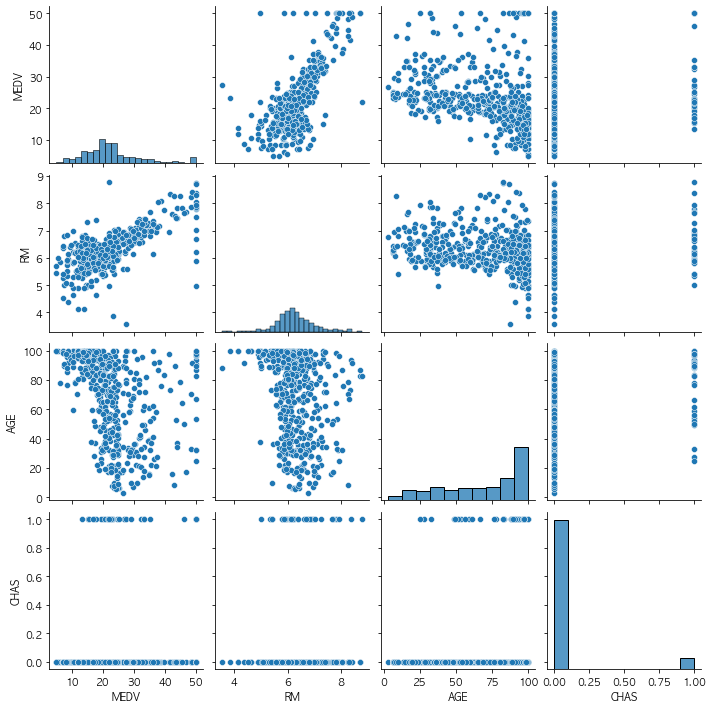

In [15]:
sns.pairplot(df[["MEDV", "RM", "AGE", "CHAS"]])
plt.show()

In [16]:
# 회귀모형 적합
model = sm.OLS(dfy, dfX)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 10 Jul 2021   Prob (F-statistic):          6.72e-135
Time:                        14:06:09   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

## 추정된 회귀모형식
$$
\begin{split}
\begin{aligned}
\text{MEDV} =& 36.4595 - 0.1080\,\text{CRIM} + 0.0464\,\text{ZN}  + 0.0206\,\text{INDUS}  + 2.6867 \,\text{CHAS} \\
&  -17.7666\,\text{NOX}  + 3.8099\,\text{RM}  + 0.0007\,\text{AGE}  -1.4756\,\text{DIS} + 0.3060\,\text{RAD} \\
&  -0.0123\,\text{TAX}  -0.9527\,\text{PTRATIO}  + 0.0093 \,\text{B} -0.5248\,\text{LSTAT}
\end{aligned}
\end{split}
$$